# Data Mining Project
## From Reservation to Check-In: Data-Driven Insights for Optimizing Hotel Bookings - Predicting Cancellations and Understanding Customer Preferences
### Asif Mursalin - 60100148
### Ashraf Salem - 60104564
### Mehdi Bouktib - 60105112 

```bash
pip install -r requirements.txt
```

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import copy

In [2]:
df = pd.read_csv("hotel_bookings_raw.csv")

First 5 rows

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


Last 10 rows

In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [5]:
df.shape

(119390, 43)

# Hotel Booking Dataset Column Descriptions

## 1. Booking Status and Basic Information
- `hotel`: Type of hotel
- `is_canceled`: Whether the booking was canceled (binary: 0/1)
- `reservation_status`: Current status of the reservation
- `reservation_status_date`: Date of the last status update

## 2. Temporal Information
- `lead_time`: Number of days between booking and arrival date
- `arrival_date_year`: Year of arrival
- `arrival_date_month`: Month of arrival
- `arrival_date_week_number`: Week number of arrival
- `arrival_date_day_of_month`: Day of month of arrival
- `MO_YR`: Month and year combined

## 3. Stay Details
- `stays_in_weekend_nights`: Number of weekend nights booked
- `stays_in_week_nights`: Number of weekday nights booked
- `adults`: Number of adults
- `children`: Number of children
- `babies`: Number of babies

## 4. Room and Service Information
- `meal`: Type of meal plan
- `reserved_room_type`: Type of room reserved
- `assigned_room_type`: Type of room actually assigned
- `required_car_parking_spaces`: Number of parking spaces needed
- `total_of_special_requests`: Number of special requests made

## 5. Customer Information
- `country`: Country of origin
- `is_repeated_guest`: Whether the guest has stayed before
- `previous_cancellations`: Number of previous cancellations
- `previous_bookings_not_canceled`: Number of previous non-canceled bookings
- `customer_type`: Type of customer

## 6. Business/Distribution Information
- `market_segment`: Market segment (e.g., direct, corporate)
- `distribution_channel`: Booking distribution channel
- `agent`: ID of the travel agency
- `booking_changes`: Number of changes made to the booking
- `deposit_type`: Type of deposit made
- `adr`: Average Daily Rate
- `days_in_waiting_list`: Days spent on waiting list

## 7. Economic Indicators
- `CPI_AVG`: Consumer Price Index average
- `INFLATION`: Inflation rate
- `INFLATION_CHG`: Change in inflation
- `CSMR_SENT`: Consumer sentiment
- `UNRATE`: Unemployment rate
- `INTRSRT`: Interest rate
- `GDP`: Gross Domestic Product
- `FUEL_PRCS`: Fuel prices
- `CPI_HOTELS`: CPI specific to hotels
- `US_GINI`: Gini coefficient (income inequality measure)
- `DIS_INC`: Disposable income

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'MO_YR', 'CPI_AVG',
       'INFLATION', 'INFLATION_CHG', 'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP',
       'FUEL_PRCS', 'CPI_HOTELS', 'US_GINI', 'DIS_INC'],
      dtype='object')

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df['agent'] = df['agent'].astype('Int64')

In [9]:
binary_columns = ['is_canceled', 'is_repeated_guest']

# Date columns
date_columns = [
    'reservation_status_date'
]

# Numeric columns
numeric_columns = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'CPI_AVG',
    'INFLATION',
    'INFLATION_CHG',
    'CSMR_SENT',
    'UNRATE',
    'INTRSRT',
    'GDP',
    'FUEL_PRCS',
    'CPI_HOTELS',
    'US_GINI',
    'DIS_INC'
]

# Categorical columns
categorical_columns = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'agent' 
]

In [10]:
def fix_datatypes(df):
    # Make a copy to avoid modifying the original dataframe
    df = copy.deepcopy(df)
    
    # Convert dates
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
    
    # Convert numeric columns
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert categorical columns
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    
    # Convert binary columns
    for col in binary_columns:
        df[col] = df[col].astype('bool')
    # Handle 'MO_YR' as string
    df['MO_YR'] = df['MO_YR'].astype(str)
    
    return df

In [11]:
df = fix_datatypes(df)
df.dtypes

hotel                                   category
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [12]:
booking_by_month = df.groupby(['arrival_date_month', 'hotel']).size()
booking_by_month

C:\Users\salem\AppData\Local\Temp\ipykernel_32660\3460393484.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_by_month = df.groupby(['arrival_date_month', 'hotel']).size()


arrival_date_month  hotel       
April               City Hotel      7480
                    Resort Hotel    3609
August              City Hotel      8983
                    Resort Hotel    4894
December            City Hotel      4132
                    Resort Hotel    2648
February            City Hotel      4965
                    Resort Hotel    3103
January             City Hotel      3736
                    Resort Hotel    2193
July                City Hotel      8088
                    Resort Hotel    4573
June                City Hotel      7894
                    Resort Hotel    3045
March               City Hotel      6458
                    Resort Hotel    3336
May                 City Hotel      8232
                    Resort Hotel    3559
November            City Hotel      4357
                    Resort Hotel    2437
October             City Hotel      7605
                    Resort Hotel    3555
September           City Hotel      7400
                    Reso

In [13]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure()

# Add traces, one for each hotel
for hotel_type in df['hotel'].unique():
    hotel_data = df[df['hotel'] == hotel_type]
    monthly_counts = hotel_data['arrival_date_month'].value_counts().reset_index()
    monthly_counts.columns = ['Month', 'Bookings']
    
    # Define month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'], 
                                           categories=month_order, 
                                           ordered=True)
    monthly_counts = monthly_counts.sort_values('Month')
    
    fig.add_trace(
        go.Bar(
            name=hotel_type,
            x=monthly_counts['Month'],
            y=monthly_counts['Bookings'],
            visible=True
        )
    )

# Add buttons for hotel selection
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list([
                dict(
                    label="All Hotels",
                    method="update",
                    args=[{"visible": [True, True]},
                          {"title": "All Hotels Booking Distribution"}]),
                dict(
                    label="Resort Hotel",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Resort Hotel Booking Distribution"}]),
                dict(
                    label="City Hotel",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "City Hotel Booking Distribution"}])
            ]),
        )
    ]
)

# Update layout
fig.update_layout(
    title="Hotel Bookings Distribution",
    xaxis_title="Month",
    yaxis_title="Number of Bookings",
    barmode='group',
    height=600,
    width=1000,
    showlegend=True
)

fig.show()

# Dealing with missing values

In [14]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)


Missing values per column:
 children             4
country            488
agent            16340
CPI_AVG            181
INFLATION          181
INFLATION_CHG      181
CSMR_SENT          181
UNRATE             181
INTRSRT            181
GDP                181
FUEL_PRCS          181
CPI_HOTELS         181
US_GINI            181
DIS_INC            181
dtype: int64
Total missing values: 18823


## Visualizing missing values in a column

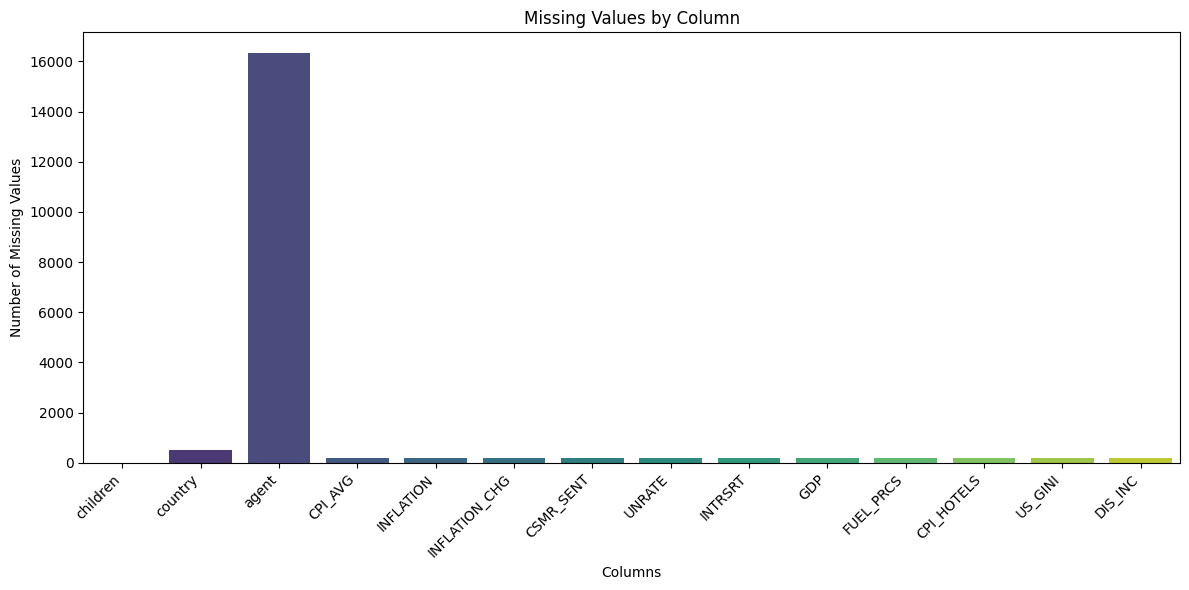

In [15]:

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

- The children column contains the number of children the guest will bring
- We will asssume the null value means the guest has no children

## Children Missing 

In [16]:
# Fill children column missing values
# df['children'].fillna(0, inplace=True)
df['children'] = df['children'].fillna(0)

## Country missing

In [17]:
# Replace missing values with the mode of the column country
mode_country = df['country'].mode()[0]
print(mode_country)
df['country'] = df['country'].fillna(mode_country)

PRT


## Agent Missing

In [18]:
df['agent'] = df['agent'].astype('object')  # temporarily convert to object
df['agent'] = df['agent'].fillna(0)

df['agent'] = df['agent'].astype('category')

C:\Users\salem\AppData\Local\Temp\ipykernel_32660\2899670480.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [19]:
df[['agent']].head()

,agent
0,0
1,0
2,0
3,304
4,240


Replacing missing values with '0' of the column Agent as it states that no agent was involved in the booking

In [20]:
missing_values_count = df.isnull().sum()[df.isnull().sum()>0]
total_missing = df.isnull().sum().sum() 

print("Missing values per column:\n", missing_values_count)
print("Total missing values:", total_missing)

Missing values per column:
 CPI_AVG          181
INFLATION        181
INFLATION_CHG    181
CSMR_SENT        181
UNRATE           181
INTRSRT          181
GDP              181
FUEL_PRCS        181
CPI_HOTELS       181
US_GINI          181
DIS_INC          181
dtype: int64
Total missing values: 1991


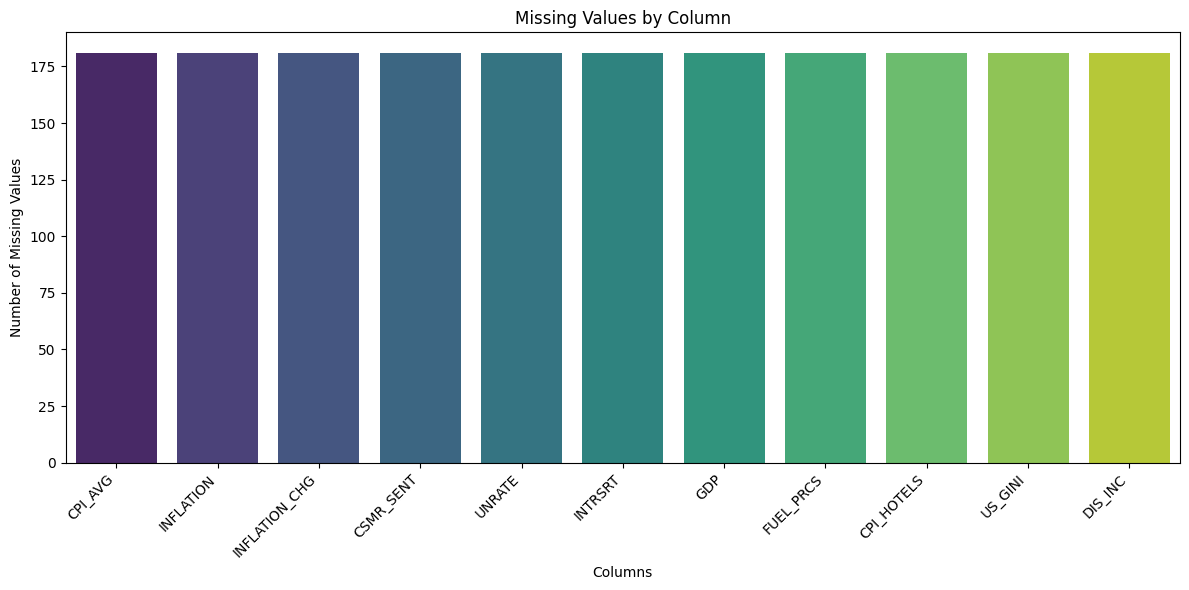

In [21]:

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=missing_values_count.index, 
            y=missing_values_count.values,
            hue=missing_values_count.index,
            palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

## CPI_AVG
- replacing the null values in the CPI_AVG columns that indicates consumer price index average with mean as it maintains the dataset's overall balance and avoids skewing results

In [22]:
mean_CPI = df['CPI_AVG'].mean()
print(mean_CPI)
df['CPI_AVG'] = df['CPI_AVG'].fillna(mean_CPI)

240.78065240879465


# Inflation
- replacing null values in the Inflation column with Interpolation as it Estimates missing values based on surrounding data points, preserving the column’s natural trends over time

In [23]:
df['INFLATION'] = df['INFLATION'].interpolate(method='linear')
print(df['INFLATION'].isnull().sum())


0


# CSMR_SENT (costumer sentiment)


In [24]:
# Replace missing values with the mode of the column CSMR_SENT
mode_csmr = df['CSMR_SENT'].mode()[0]
print(mode_csmr)
df['CSMR_SENT'] = df['CSMR_SENT'].fillna(mode_csmr)

90.0


# UNRATE (Unemployment rate) 
- replacing the null values in the UNRATE column that indicates Unemployment rate with mean as it maintains the dataset's overall balance and avoids skewing results

In [25]:
Unrate_Mean = df['UNRATE'].mean()
print(Unrate_Mean)
df['UNRATE'] = df['UNRATE'].fillna(Unrate_Mean)

4.827967687003499


Text(0, 0.5, 'Count')

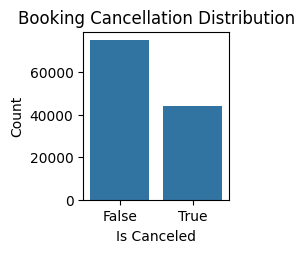

In [26]:
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     14907
        True       0.98      0.90      0.93      8971

    accuracy                           0.95     23878
   macro avg       0.96      0.94      0.95     23878
weighted avg       0.95      0.95      0.95     23878



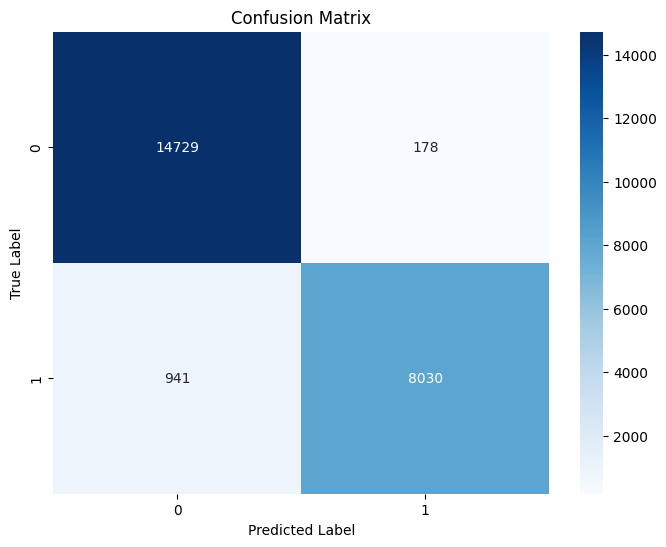

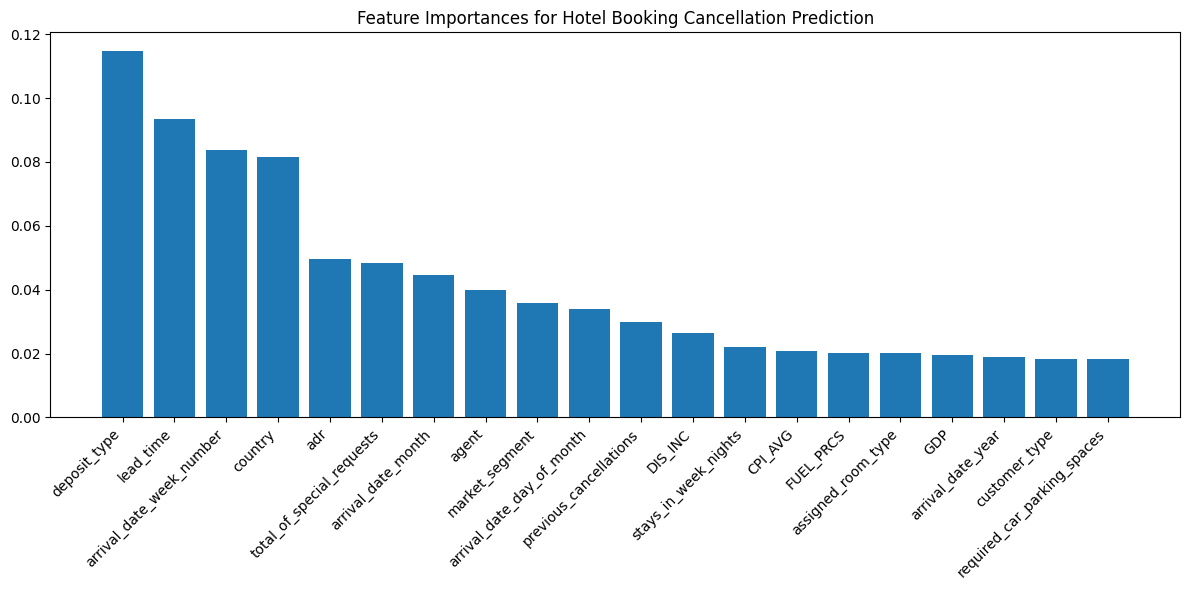


Top 20 Most Important Features:
deposit_type: 0.1149
lead_time: 0.0934
arrival_date_week_number: 0.0837
country: 0.0817
adr: 0.0498
total_of_special_requests: 0.0485
arrival_date_month: 0.0446
agent: 0.0398
market_segment: 0.0360
arrival_date_day_of_month: 0.0340
previous_cancellations: 0.0299
DIS_INC: 0.0263
stays_in_week_nights: 0.0221
CPI_AVG: 0.0208
FUEL_PRCS: 0.0201
assigned_room_type: 0.0200
GDP: 0.0194
arrival_date_year: 0.0188
customer_type: 0.0183
required_car_parking_spaces: 0.0182


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Create a copy to avoid modifying the original dataframe
    df_model = df.copy()
    
    # Drop columns that shouldn't be used for prediction
    columns_to_drop = ['reservation_status', 'reservation_status_date', 'MO_YR']
    df_model = df_model.drop(columns=columns_to_drop, errors='ignore')
    
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        if column in df_model.columns:
            df_model[column] = le.fit_transform(df_model[column].astype(str))
    
    return df_model

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    return rf, X_train, X_test, y_train, y_test, y_pred

def plot_feature_importance(rf, feature_names):
    # Get feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances for Hotel Booking Cancellation Prediction")
    plt.bar(range(20), importances[indices][:20])
    plt.xticks(range(20), [feature_names[i] for i in indices][:20], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print numerical values
    print("\nTop 20 Most Important Features:")
    for i in range(20):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

def analyze_cancellations():
    # Prepare the data
    df_model = prepare_data(df)
    
    # Separate features and target
    X = df_model.drop('is_canceled', axis=1)
    y = df_model['is_canceled']
    
    # Train the model and get predictions
    rf, X_train, X_test, y_train, y_test, y_pred = train_random_forest(X, y)
    
    # Print model performance
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot feature importance
    plot_feature_importance(rf, X.columns)
    
    return rf, X, y

# Run the analysis
rf_model, X, y = analyze_cancellations()

# Customer Segmentation

### Country of origin (top booking countries)


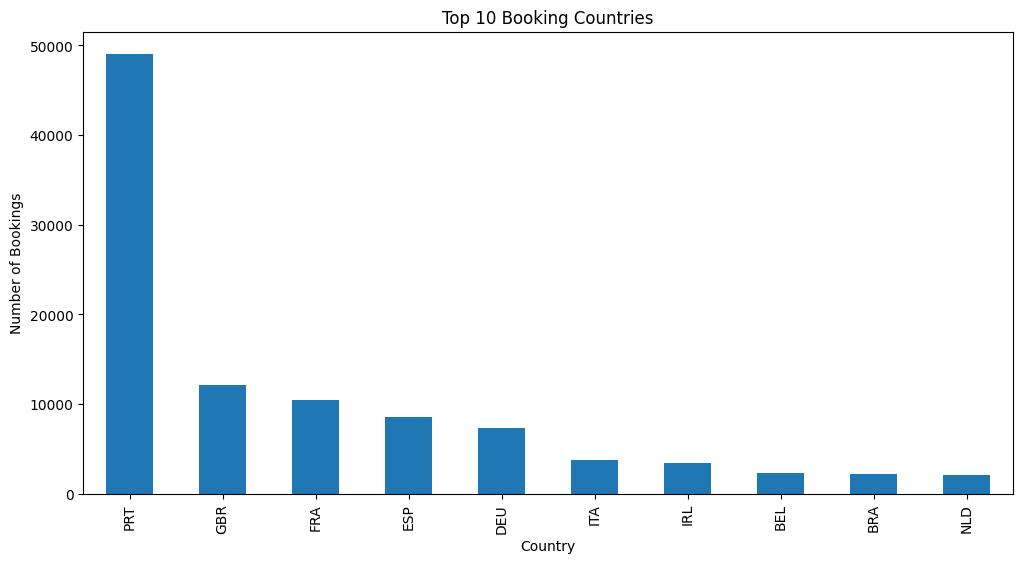

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [28]:
def country_analysis(dataframe):
    # Count bookings by country
    country_counts = dataframe['country'].value_counts().head(10)
    
    plt.figure(figsize=(12,6))
    country_counts.plot(kind='bar')
    plt.title('Top 10 Booking Countries')
    plt.xlabel('Country')
    plt.ylabel('Number of Bookings')
    plt.show()
    
    return country_counts
country_analysis(df)


### Customer type
- There are 4 types of Customer : 
1) Transient:  Individual or small group travelers booking short stays that its mostly for business.
2) Transient Party: Similar to Transient but refers to a smaller group travelling together 
3) Contract: Guests whos stays depending on a pre-negotiated agreements for example airline crews
4) Group: Larger groups of people booking for an event that its often multiple rooms and services 

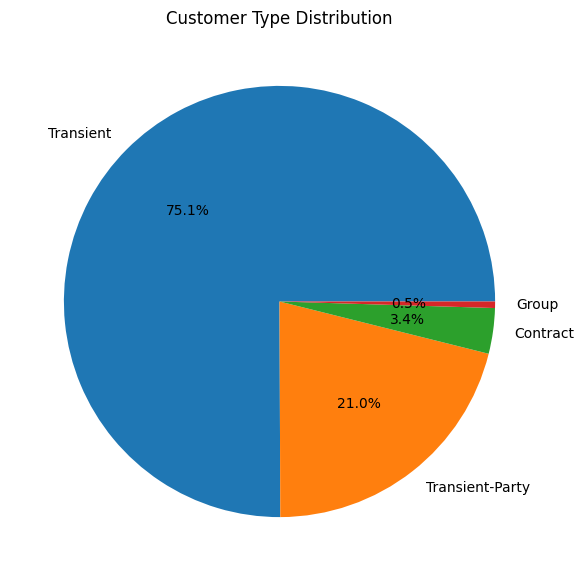

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [29]:
def customer_type_analysis(df):
    customer_type_dist = df['customer_type'].value_counts()
    
    plt.figure(figsize=(10,7))
    customer_type_dist.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Customer Type Distribution')
    plt.ylabel('')
    plt.show()
    
    return customer_type_dist

customer_type_analysis(df)


### Repeat vs. new customers

C:\Users\salem\AppData\Local\Temp\ipykernel_32660\2356061341.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



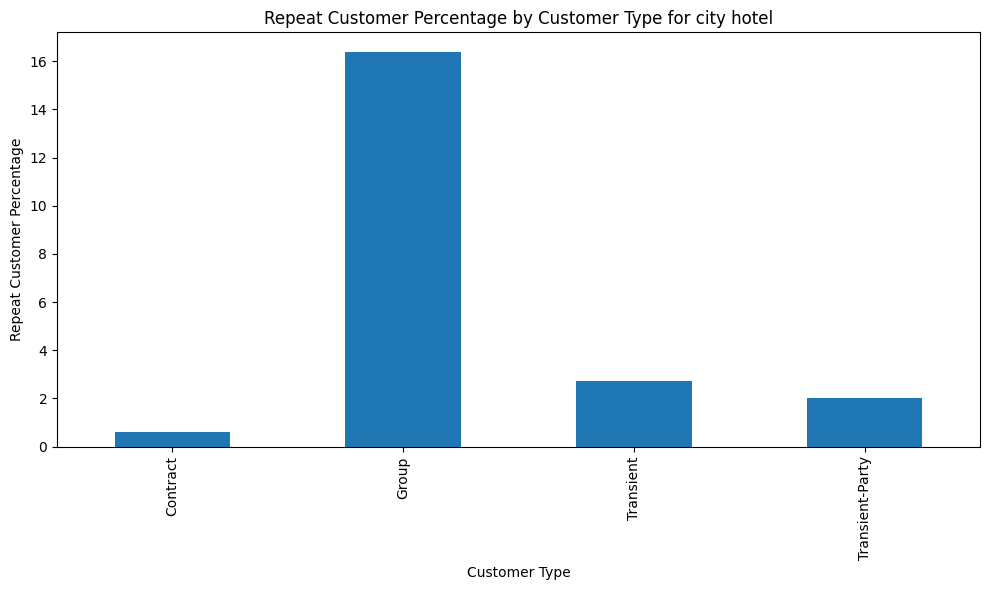

In [30]:
def city_repeat_customer_analysis(df):
    city_hotel = df[df['hotel']=='City Hotel']

    city_repeat_customers = city_hotel.groupby('customer_type')['is_repeated_guest'].mean() * 100 # For Percentage view
    
    plt.figure(figsize=(10,6))
    city_repeat_customers.plot(kind='bar')
    plt.title('Repeat Customer Percentage by Customer Type for city hotel')
    plt.xlabel('Customer Type')
    plt.ylabel('Repeat Customer Percentage')
    plt.tight_layout()
    plt.show()
    
    return city_repeat_customers    

city_repeat_customers = city_repeat_customer_analysis(df)


C:\Users\salem\AppData\Local\Temp\ipykernel_32660\4095704785.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



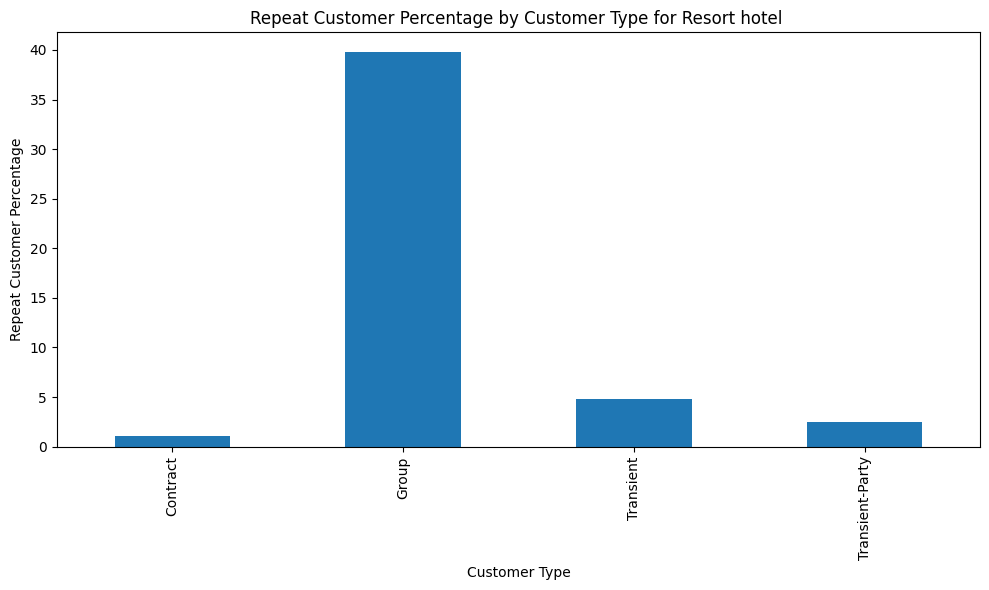

In [31]:
def resort_repeat_customer_analysis(df):
    resort_hotel = df[df['hotel']=='Resort Hotel']

    resort_repeat_customers = resort_hotel.groupby('customer_type')['is_repeated_guest'].mean() * 100 # For Percentage view
    
    plt.figure(figsize=(10,6))
    resort_repeat_customers.plot(kind='bar')
    plt.title('Repeat Customer Percentage by Customer Type for Resort hotel ')
    plt.xlabel('Customer Type')
    plt.ylabel('Repeat Customer Percentage')
    plt.tight_layout()
    plt.show()
    
    return resort_repeat_customers    

resort_repeat_customers = resort_repeat_customer_analysis(df)


In [32]:
df_family = df.copy()
df_family

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


### Family Composition Analysis

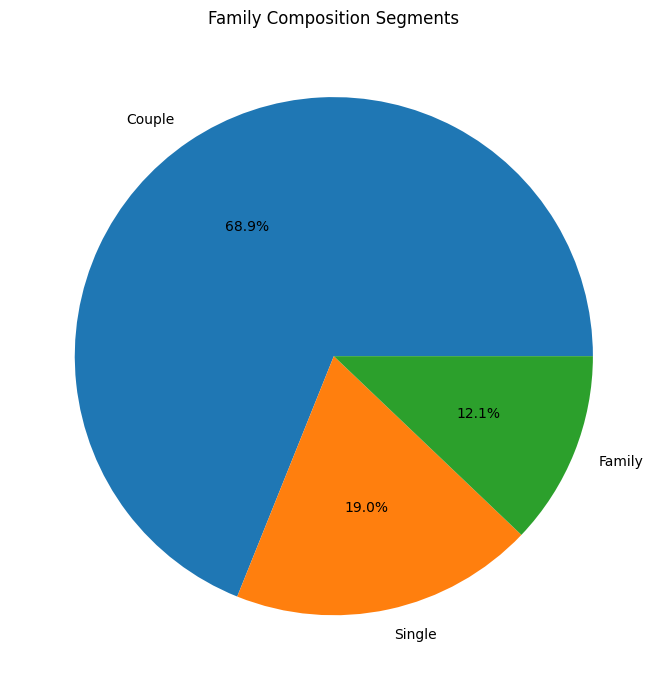

Total_Guests
Couple    82051
Single    22581
Family    14424
Name: count, dtype: int64

In [33]:
def family_Composition(df_family):
    df_family["Total_Guests"] = df_family["adults"] + df_family["children"] + df_family["babies"]
    family_count = pd.cut(df_family['Total_Guests'],bins=[0,1,2,4],labels=['Single','Couple','Family'])
    family_distrbution = family_count.value_counts()
    plt.figure(figsize=(10,7))
    plt.pie(family_distrbution.values, labels= family_distrbution.index,autopct='%1.1f%%')
    plt.title('Family Composition Segments')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    
    return family_distrbution

family_Composition(df_family)

### Market Segment distribution 

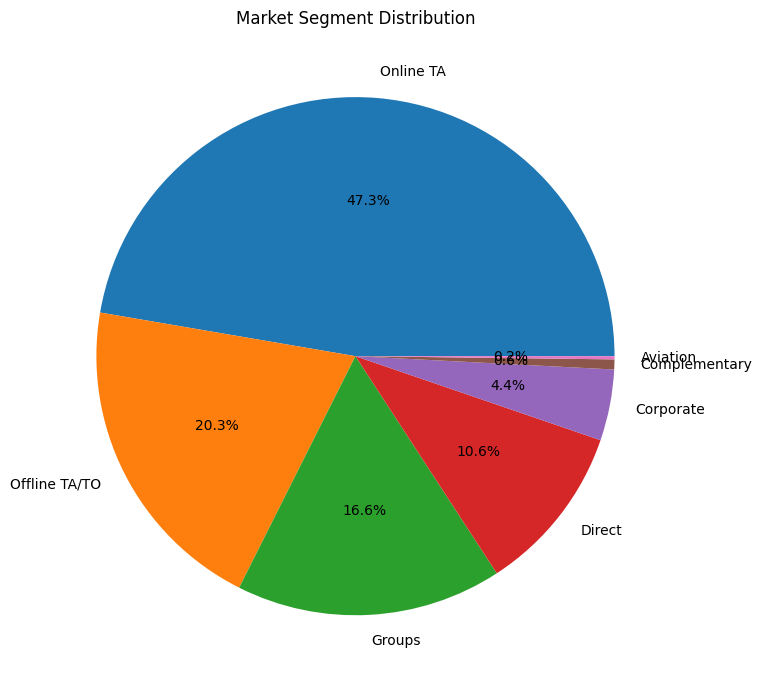

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

In [34]:
def market_segment_analysis(df):
    market_segment_dist = df['market_segment'].value_counts()
    market_segment_dist = market_segment_dist.drop("Undefined")
    
    plt.figure(figsize=(10,7))
    plt.pie(market_segment_dist.values, labels= market_segment_dist.index,autopct='%1.1f%%',)
    plt.title('Market Segment Distribution')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    return market_segment_dist

market_segment_analysis(df_family)


C:\Users\salem\AppData\Local\Temp\ipykernel_32660\3674355011.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



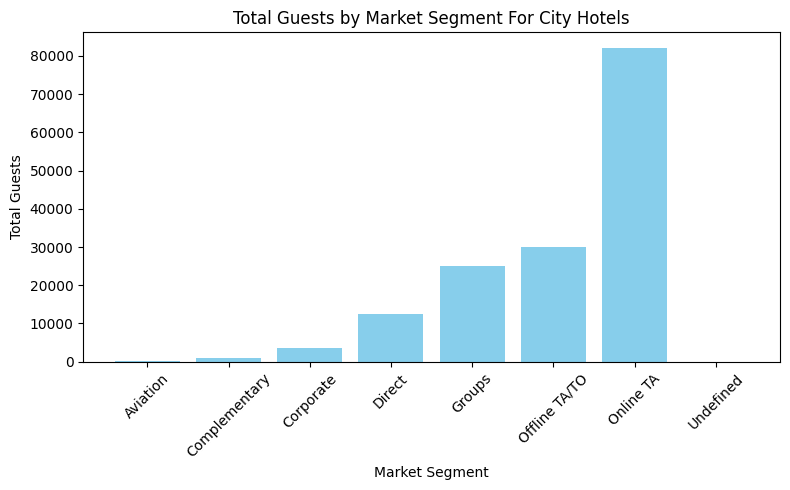

,market_segment,Total_Guests
0,Aviation,238.0
1,Complementary,851.0
2,Corporate,3689.0
3,Direct,12414.0
4,Groups,25110.0
5,Offline TA/TO,30117.0
6,Online TA,82054.0
7,Undefined,5.0


In [35]:
def city_travelers_market_analysis(df_family):
    city_hotel = df_family[df_family['hotel']=='City Hotel']
    group_market_dist = city_hotel.groupby('market_segment')['Total_Guests'].sum().reset_index()
    plt.figure(figsize=(8, 5))
    plt.bar(group_market_dist['market_segment'], group_market_dist['Total_Guests'], color='skyblue')
    plt.title('Total Guests by Market Segment For City Hotels')
    plt.xlabel('Market Segment')
    plt.ylabel('Total Guests')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return group_market_dist
city_travelers_market_analysis(df_family)



C:\Users\salem\AppData\Local\Temp\ipykernel_32660\1798386414.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



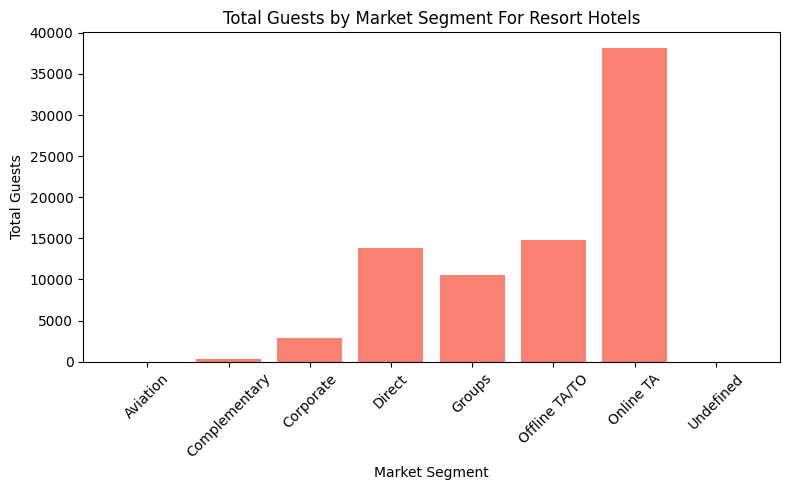

,market_segment,Total_Guests
0,Aviation,0.0
1,Complementary,336.0
2,Corporate,2925.0
3,Direct,13768.0
4,Groups,10559.0
5,Offline TA/TO,14774.0
6,Online TA,38148.0
7,Undefined,0.0


In [36]:
def resort_travelers_market_analysis(df_family):
    Resort_hotel = df_family[df_family['hotel']=='Resort Hotel']
    group_market_dist = Resort_hotel.groupby('market_segment')['Total_Guests'].sum().reset_index()

    plt.figure(figsize=(8, 5))
    plt.bar(group_market_dist['market_segment'], group_market_dist['Total_Guests'], color='Salmon')
    plt.title('Total Guests by Market Segment For Resort Hotels')
    plt.xlabel('Market Segment')
    plt.ylabel('Total Guests')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return group_market_dist
resort_travelers_market_analysis(df_family)